In [1]:
import pandas as pd 
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df  = pd.read_csv('symbols-correlation-clusters.csv', index_col = 'Symbol')
df.head()

,ITW,ETN,PWR,PVH,EXPD,PRU,F,FAST,FBHS,ETFC,...,BLL,REG,VMC,VNO,VRSK,FRT,GIS,PG,ARE,MDLZ
Symbol,,,,,,,,,,,,,,,,,,,,,
ITW,-0.523810,0.893805,0.714286,0.626374,0.814433,0.676768,0.729730,1.000000,0.795455,0.670330,...,-0.117647,-0.270833,-0.347368,-0.095238,-0.027027,-0.354839,-0.212121,-0.152941,-0.386667,-0.246377
ETN,0.866667,-0.398230,0.642857,0.736264,0.876289,0.616162,0.864865,0.977011,0.681818,0.648352,...,-0.058824,-0.354167,-0.242105,0.023810,-0.135135,-0.548387,-0.575758,-0.176471,-0.200000,-0.362319
PWR,0.352381,0.362832,-0.380952,0.230769,0.422680,0.313131,0.297297,0.540230,0.454545,0.494505,...,-0.323529,-0.166667,-0.263158,-0.166667,-0.162162,-0.161290,-0.303030,-0.482353,-0.173333,-0.391304
PVH,0.352381,0.504425,0.285714,-0.384615,0.587629,0.494949,0.540541,0.540230,0.500000,0.384615,...,-0.470588,-0.270833,-0.389474,-0.261905,-0.270270,-0.397849,-0.242424,-0.317647,-0.440000,-0.159420
EXPD,0.638095,0.734513,0.619048,0.714286,-0.443299,0.494949,0.594595,0.632184,0.545455,0.318681,...,-0.500000,-0.229167,-0.157895,-0.119048,-0.027027,-0.290323,-0.272727,-0.317647,-0.253333,-0.159420


In [3]:
def plot_corr(corr,size=10):

   # Generate a mask for the upper triangle

    #df_stack = corr.where(np.tril(np.ones(corr.shape) , k = -1).astype(np.bool))
    df_stack = corr.copy()
    
    # Plot the correlation matrix
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(df_stack, cmap='RdYlGn')
    #plt.xticks(range(len(df_stack.columns)), df_stack.columns, rotation=90);
    #plt.yticks(range(len(df_stack.columns)), df_stack.columns);
    
    # Add the colorbar legend
    cbar = fig.colorbar(cax,  aspect=40, shrink=.8)

In [4]:
def plot_corr2(corr,size=10):

   # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    
   
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(size, size))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(240, 10, n =9, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask= mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

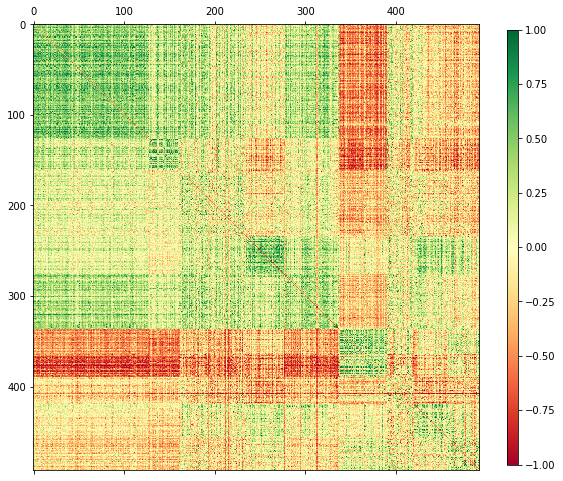

In [10]:
plot_corr(df, size=10)
plt.savefig('fig/after-clustering.png', format='png', dpi=400 ,bbox_inches='tight', pad_inches=0)

In [6]:
df_  = pd.read_csv('symbols-correlation.csv', index_col = 'Symbol')
df_.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Symbol,,,,,,,,,,,,,,,,,,,,,
A,116,141,128,160,152,140,142,160,166,154,...,147,153,139,150,151,128,151,154,146,155
AAL,141,116,137,146,144,129,125,134,136,140,...,144,154,117,154,146,113,135,132,153,135
AAP,128,137,116,139,147,122,124,126,134,127,...,134,140,130,151,146,120,128,127,140,127
AAPL,160,146,139,116,140,120,136,150,157,143,...,153,156,123,155,150,133,146,152,141,145
ABBV,152,144,147,140,116,141,158,155,163,143,...,129,145,140,147,144,124,145,138,150,144


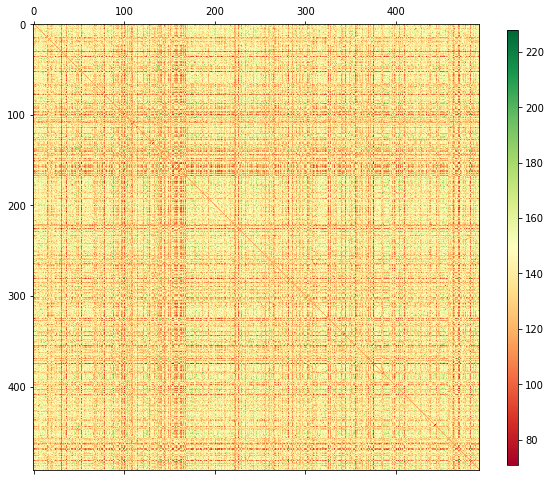

In [9]:
plot_corr(df_, size=10)
plt.savefig('fig/befor-clustering.png', format='png', dpi=400 ,bbox_inches='tight', pad_inches=0)

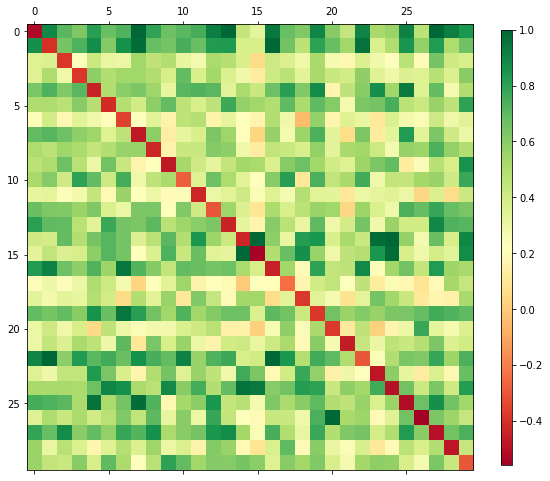

In [8]:
plot_corr(df.iloc[:30,:30], size=10)